# Demo grouped_stacked_bars graph

Required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import sys
sys.path.append('/home/bill/software/lca_standard_graphs/')
import lca_standard_graphs as lsg
import imp
imp.reload(lsg)
keep = ('Impact category', 'Technology')

## DataFrame saved as pickle. Load it:

In [2]:
df1 = pd.read_csv('demoData_2technologies_ordered.csv', index_col=[0,1])
df1

ccs  fuel provision  \
Impact category          Technology                              
Ammonia emissions        tech1        5.555556       11.111111   
                         tech2       11.111111       22.222222   
Carbon monoxide emission tech1        5.555556       11.111111   
                         tech2       22.222222       44.444444   
Climate change           tech1        5.555556       11.111111   
                         tech2       22.222222       44.444444   

                                     infrastructure  operation  \
Impact category          Technology                              
Ammonia emissions        tech1            22.222222  33.333333   
                         tech2            38.888889  55.555556   
Carbon monoxide emission tech1            16.666667  27.777778   
                         tech2            66.666667  77.777778   
Climate change           tech1            16.666667  27.777778   
                         tech2            66.666667  77.777778   

                                     pollution control  transmission  
Impact category          Technology                                   
Ammonia emissions        tech1               50.000000     66.666667  
                         tech2               77.777778    100.000000  
Carbon monoxide emission tech1               38.888889     50.000000  
                         tech2               88.888889    100.000000  
Climate change           tech1               38.888889     50.000000  
                         tech2               88.888889    100.000000

In [3]:
err_pos = pd.DataFrame(index=df1.index.levels[0], columns=['tech1', 'tech2'], data=np.random.rand(3,2) * 30).reset_index()
err_neg = pd.DataFrame(index=df1.index.levels[0], columns=['tech1', 'tech2'], data=np.random.rand(3,2) * 30).reset_index()
err_neg = err_neg.melt(id_vars='Impact category', var_name='Technology', value_name='err_neg').set_index(['Impact category', 'Technology'])
err_pos = err_pos.melt(id_vars='Impact category', var_name='Technology', value_name='err_pos').set_index(['Impact category', 'Technology'])
err_pos

,,err_pos
Impact category,Technology,
Ammonia emissions,tech1,14.097114
Carbon monoxide emission,tech1,18.039519
Climate change,tech1,23.269602
Ammonia emissions,tech2,25.543745
Carbon monoxide emission,tech2,13.260332
Climate change,tech2,29.931430


In [4]:
df1 = pd.concat([df1, err_neg, err_pos], axis=1).reset_index()

In [5]:
df1

,Impact category,Technology,ccs,fuel provision,infrastructure,operation,pollution control,transmission,err_neg,err_pos
0,Ammonia emissions,tech1,5.555556,11.111111,22.222222,33.333333,50.000000,66.666667,24.150660,14.097114
1,Ammonia emissions,tech2,11.111111,22.222222,38.888889,55.555556,77.777778,100.000000,27.652367,25.543745
2,Carbon monoxide emission,tech1,5.555556,11.111111,16.666667,27.777778,38.888889,50.000000,6.587600,18.039519
3,Carbon monoxide emission,tech2,22.222222,44.444444,66.666667,77.777778,88.888889,100.000000,28.787644,13.260332
4,Climate change,tech1,5.555556,11.111111,16.666667,27.777778,38.888889,50.000000,1.014931,23.269602
5,Climate change,tech2,22.222222,44.444444,66.666667,77.777778,88.888889,100.000000,16.506112,29.931430


In [6]:
df1_tidy = df1.melt(id_vars=[ 'Impact category', 'Technology', 'err_pos', 'err_neg' ])

In [7]:
df1_tidy

,Impact category,Technology,err_pos,err_neg,variable,value
0,Ammonia emissions,tech1,14.097114,24.150660,ccs,5.555556
1,Ammonia emissions,tech2,25.543745,27.652367,ccs,11.111111
2,Carbon monoxide emission,tech1,18.039519,6.587600,ccs,5.555556
3,Carbon monoxide emission,tech2,13.260332,28.787644,ccs,22.222222
4,Climate change,tech1,23.269602,1.014931,ccs,5.555556
5,Climate change,tech2,29.931430,16.506112,ccs,22.222222
6,Ammonia emissions,tech1,14.097114,24.150660,fuel provision,11.111111
7,Ammonia emissions,tech2,25.543745,27.652367,fuel provision,22.222222
8,Carbon monoxide emission,tech1,18.039519,6.587600,fuel provision,11.111111
9,Carbon monoxide emission,tech2,13.260332,28.787644,fuel provision,44.444444


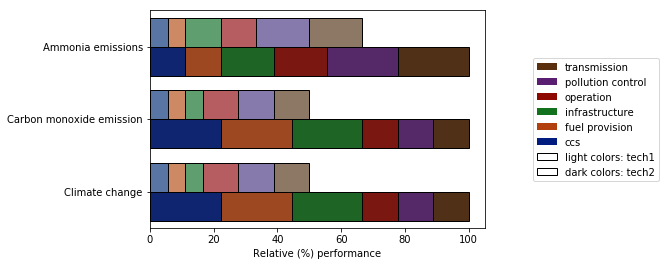

In [11]:
ax, fig = lsg._plot_grouped_stackedbars_from_tidycumsum(df1_tidy, 
                                                 categories='Impact category',
                                                 stacked_portions='variable',
                                                 values='value',
                                                 entities_compared='Technology')
_ = ax.xaxis.set_label_text('Relative (%) performance')

# Robust to different order? yes

In [12]:
df2 = pd.read_csv('demoData_2technologies_disordered.csv')
df2tidy = df2.melt(id_vars=keep, var_name='stages')

In [13]:
df2tidy['Technology'].unique()

array(['tech2', 'tech1'], dtype=object)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f23e5af5710>,
 <Figure size 432x288 with 1 Axes>)

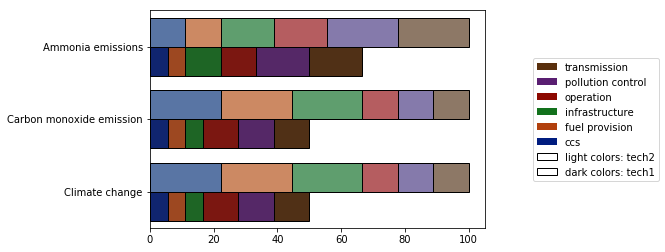

In [15]:
lsg._plot_grouped_stackedbars_from_tidycumsum(
                             df2tidy, 
                             categories='Impact category', 
                             stacked_portions='stages', 
                             values='value', 
                             entities_compared='Technology')

# 3 technologies compared

In [16]:
df3 = pd.read_csv('demoData_3technologies_ordered.csv')
df3tidy = df3.melt(id_vars=keep, var_name='stages')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f23e59b6e10>,
 <Figure size 432x288 with 1 Axes>)

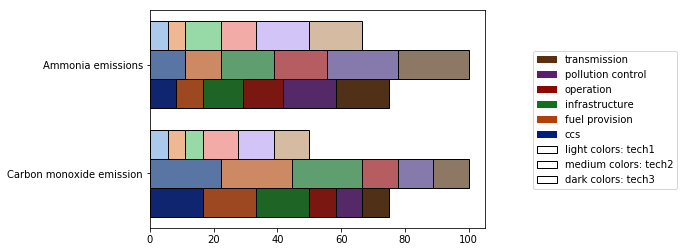

In [18]:
lsg._plot_grouped_stackedbars_from_tidycumsum(df3tidy, categories='Impact category', 
                             stacked_portions='stages', 
                             values='value', 
                             entities_compared='Technology', orient='h')

# N technologies compared

(<matplotlib.axes._subplots.AxesSubplot at 0x7f23e5996358>,
 <Figure size 432x288 with 1 Axes>)

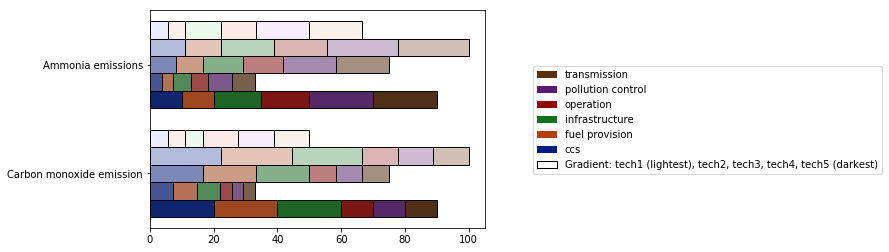

In [20]:
df4 = pd.read_csv('demoData_ntechnologies_ordered.csv')
df4tidy = df4.melt(id_vars=keep, var_name='stages')
lsg._plot_grouped_stackedbars_from_tidycumsum(df4tidy, categories='Impact category', 
                             stacked_portions='stages', 
                             values='value', 
                             entities_compared='Technology', orient='h')

### Summary results: Impact per life cycle stage

#### For one scenario, tabular:

In [ ]:
def calc_total_lcstage_impacts(df):
    return pd.crosstab(index=df['Impact category'],
                     columns=df['Life cycle stage'],
                     values=df['Impact'],
                     aggfunc='sum',
                     margins=True,
                     margins_name='Total').iloc[:-1, :]

In [ ]:
def build_comparison_table(df1, df2, name1, name2, fillna=None):
    
    column_name = 'Technology'
    a = calc_total_lcstage_impacts(df1)
    a.insert(0, column_name, name1, allow_duplicates=True)

    b = calc_total_lcstage_impacts(df2)
    b.insert(0, column_name, name2, allow_duplicates=True)
    comp = pd.concat([a,b], sort=False)
    comp.sort_index(inplace=True)
    comp.set_index('Technology', append=True, inplace=True)

    if fillna is not None:
        comp.fillna(fillna, inplace=True)
        
    return comp


In [21]:
comp = build_comparison_table(tidy_df_static_1, tidy_df_static_2, 'tech1', 'tech2', fillna=0.0)

NameError: name 'build_comparison_table' is not defined

In [ ]:
foo = comp.head(6)
foo = foo.reset_index()
foo

In [ ]:
foo = foo.reset_index()
foo.to_excel('dummy_data.xlsx')
foo = foo.set_index(['Impact category', 'Technology'])

In [ ]:
foo = pd.read_excel('dummy_data.xlsx')
foo

In [ ]:
max_imp = foo.loc[:, ['Impact category', 'Total']].groupby('Impact category').max()
max_imp = max_imp.squeeze()
foo = foo.set_index(['Impact category', 'Technology'])
foo

In [ ]:
max_imp = max_imp.reindex(foo.index, level='Impact category')
max_imp

In [ ]:
foo = foo.divide(max_imp, axis=0) * 100

In [ ]:
foo = foo.drop('Total', axis=1)

In [ ]:
fou = foo.cumsum(axis=1)
fou = fou.reset_index()

In [ ]:
fou.to_csv('demoData_2technologies_ordered.csv')

In [ ]:
stages = [i for i in fou.columns.tolist() if i not in  ['Impact category', 'Technology']]
stages_rev = [i for i in reversed(stages)]    

In [ ]:
fou_tidy = pd.melt(fou, id_vars=['Impact category', 'Technology'])

In [ ]:

fou_tidy['variable']

In [ ]:
from matplotlib.patches import Patch

-
plt.show()

In [ ]:
legend_elements.reverse()

In [ ]:
g[1]

In [ ]:
summary = pd.crosstab(index=tidy_df_static_1['Impact category'],
                     columns=tidy_df_static_1['Life cycle stage'],
                     values=tidy_df_static_1['Impact'],
                     aggfunc='sum',
                     margins=True,
                     margins_name='Total').iloc[:-1, :]
summary.tail()

In [ ]:
np.allclose(summary, summary2)

NOTE: we will add columns with precentiles from `tidy_df_stochastic`

#### For two scenarios, tabular (OUTPUT IN GUI)

Similar to above, but repeated for other scenario (there are always two scenarios)

#### For two scenarios, graphic

Same results, but as stacked bars (stack life cycle stages). 

Bars in pairs ('scen1', 'scen2'), normalized to scenario with highest impacts for given impact category.

As may pairs as there are impact categories. **We need to determine how many categories we can fit, we will have to limit the number for sure**)

Display impact category labels.

Legend = Life cycle stages.

